In [166]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from sklearn.decomposition import NMF

In [167]:
N, M = 50, 50
sigma = 3.0
n_components = 4

num_actions = 500
noise_x = np.random.normal(0, 0.5, num_actions)
noise_y = np.random.normal(0, 0.5, num_actions)
x, y = [90] + noise_x, [25] + noise_y

In [168]:
# Build HeatMaps

# 1. Counting
X, _, _ = np.histogram2d(x, y, bins=[N, M])

# 2. Normalizing (skip this part)

# 3. Smoothing
X_ = gaussian_filter(X, sigma=sigma)

In [169]:
print(X_.shape)

(50, 50)


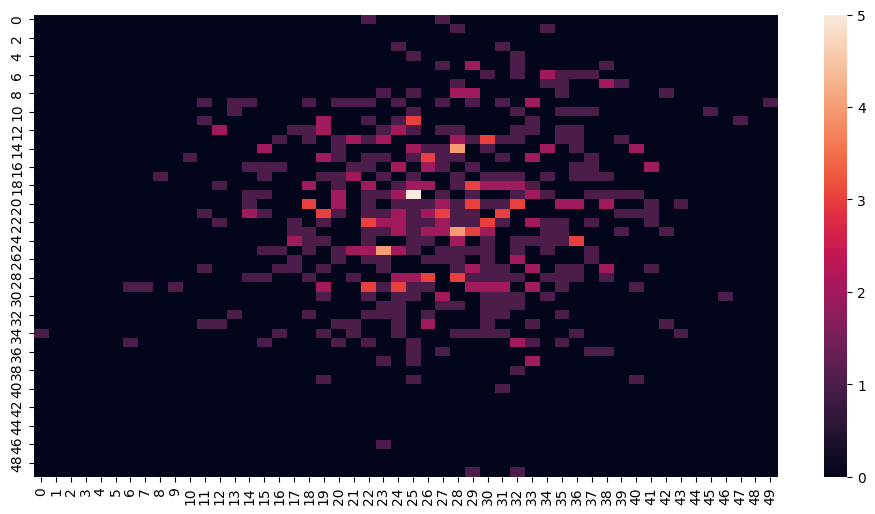

In [170]:
plt.figure(figsize=(12, 6))
sns.heatmap(X)
plt.show()

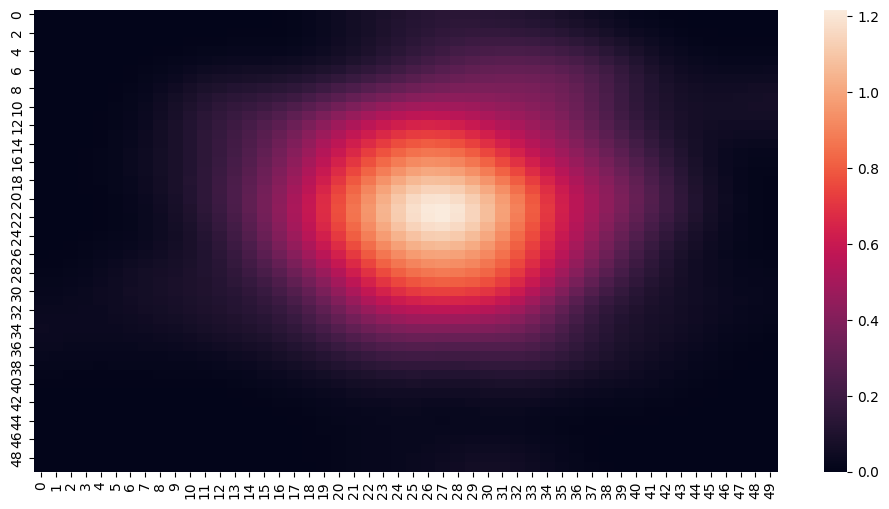

In [171]:
plt.figure(figsize=(12, 6))
sns.heatmap(X_)
plt.show()

In [172]:
X_reshape = X_.reshape(N * M, 1)
print(X_reshape.shape)

(2500, 1)


In [173]:
nmf = NMF(n_components=n_components)
W = nmf.fit_transform(X_reshape)
H = nmf.components_
print(f'Shape of W: {W.shape}')
print(f'Shape of H: {H.shape}')

Shape of W: (2500, 4)
Shape of H: (4, 1)


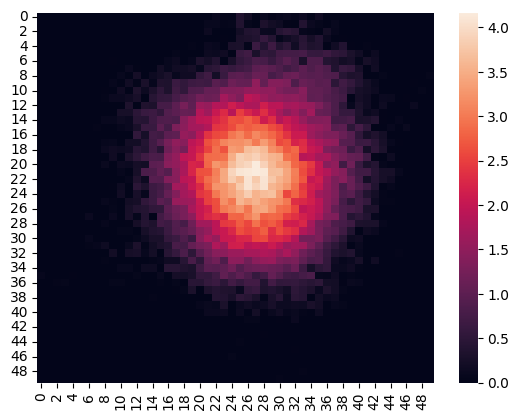

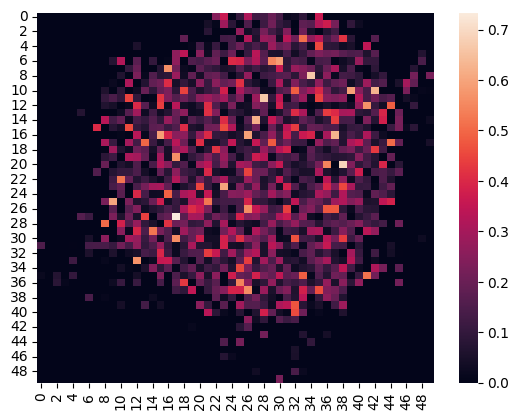

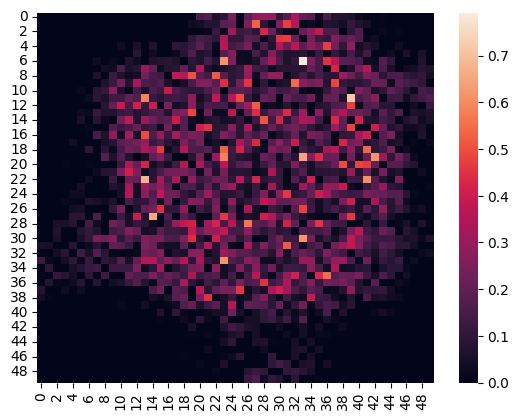

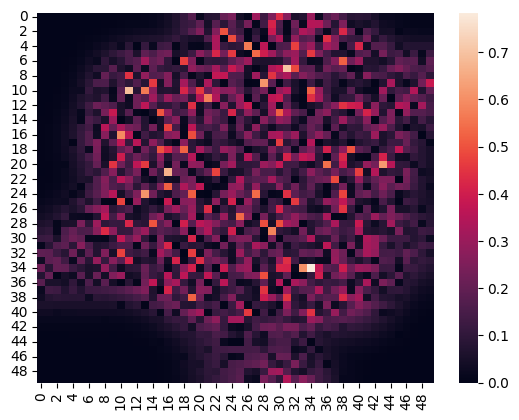

In [174]:
for n in range(n_components):
    W_n = W.T[n]
    W_n = W_n.reshape(N, M)
    sns.heatmap(W_n)
    plt.show()